In [14]:
import importlib
import gpudrive
importlib.reload(gpudrive)

import numpy as np
import os
import torch
from pathlib import Path

# Set working directory to the base directory 'gpudrive_madrona'
working_dir = Path.cwd()
while working_dir.name != 'gpudrive':
    working_dir = working_dir.parent
    if working_dir == Path.home():
        raise FileNotFoundError("Base directory 'gpudrive_madrona' not found")
os.chdir(working_dir)
import torch
from PIL import Image
import seaborn as sns
import warnings
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime

from gpudrive.env.env_torch import GPUDriveTorchEnv
from gpudrive.env.config import EnvConfig, RenderConfig
from gpudrive.env.dataset import SceneDataLoader
from gpudrive.visualize.utils import img_from_fig

sns.set("notebook", font_scale=1.05, rc={"figure.figsize": (10, 5)})
sns.set_style("ticks", rc={"figure.facecolor": "none", "axes.facecolor": "none"})
%config InlineBackend.figure_format = 'svg'
warnings.filterwarnings("ignore")
plt.set_loglevel("WARNING")
mpl.rcParams["lines.markersize"] = 8

plt.set_loglevel("WARNING")
%matplotlib inline

In [15]:
DATASET = "data/processed/wosac/validation_json_100"
FIGURES_DIR = "examples/eval/figures"
DATA_FOLDER = "examples/eval/figures_data/"

In [16]:
ref_log_replay = np.load(f"{DATA_FOLDER}reference_log_replay_smooth.npy")

ref_log_replay.shape

(5435, 91, 6)

In [17]:
valid_guidance_points = ref_log_replay[:, :, 5].sum(axis=-1)
valid_guidance_points.shape

# Some trajectories, while valid, are just parked cars
# Detect these by checking for zero velocity trajectories
valid_and_non_zero = ((ref_log_replay[:, :, 2] != 0) & (ref_log_replay[:, :, 5] == 1)).sum(axis=1)

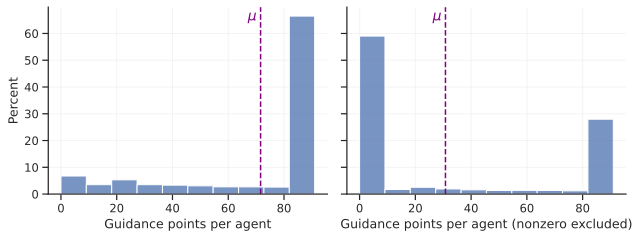

In [40]:
fig, axs = plt.subplots(1, 2, figsize=(9, 3.5), sharey=True)

#fig.suptitle(f"Distribution of guidance points per agent; A = {ref_log_replay.shape[0]}")

sns.histplot(valid_guidance_points, bins=10, stat='percent', ax=axs[0])
axs[0].grid(True, alpha=0.2)
axs[0].set_xlabel("Guidance points per agent")
mean_value = valid_guidance_points.mean()
axs[0].axvline(x=mean_value, color='purple', linestyle='--')
axs[0].text(mean_value-3, axs[0].get_ylim()[1]*0.95, r'$\mu$', color='purple', 
            fontsize=14, ha='center', va='center')

sns.histplot(valid_and_non_zero, bins=10, stat='percent', ax=axs[1])
axs[1].grid(True, alpha=0.2)
axs[1].set_xlabel(r"Guidance points per agent (nonzero excluded)")
mean_value_nonzero = valid_and_non_zero.mean()
axs[1].axvline(x=mean_value_nonzero, color='purple', linestyle='--')
axs[1].text(mean_value_nonzero-3, axs[1].get_ylim()[1]*0.95, r'$\mu$', color='purple', fontsize=14, ha='center', va='center')

plt.tight_layout()
sns.despine()
plt.savefig(f"{FIGURES_DIR}/guidance_points_distribution.pdf", dpi=300, bbox_inches="tight")

In [31]:
ref_log_replay.shape

(5435, 91, 6)

In [33]:
# Modalities
ref_log_replay[:, :, :2].shape

(5435, 91, 2)

In [ ]:
ref_log_replay[:, :, :2].shape

(389141, 2)

In [24]:
is_valid = ref_log_replay[:, :, 5] == 1

is_valid.shape

(5435, 91)